# Assignment 3: Classification with Logistic Regression

# Total: /100

## Instructions

* Complete the assignment

* Once the notebook is complete, restart your kernel and rerun your cells

* Submit this notebook to owl by the deadline

* You may use any python library functions you wish to complete the assignment.

## The Dataset

The goal of our classifier is to predict, using a logistic regression, if a patient may take a certain drug.

The dataset contains both numerical and categorical input variables, while the response variable ('Drug') has multiple levels. To simplify our analysis here, we focus on predicting if a patient may take "Drug-Y".

In [1]:
# You may need these
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, auc, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml # a helper function to download popular datasets
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
seed=0
%matplotlib inline

## Question 1: /18 pts

1. Read in the `drug.csv` dataset and display the first 5 rows.
2. Print out all columns in the dataset and list categorical variables. Use the build-in function `get_dummies()` to convert all categorical variables (**exclude Drug variable**) to dummy variables. You may read the official explanations for more information on `get_dummies()` [here](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html). What's the size of the dataframe after transforming it?
3. Map the target values from yes/no to 1/0. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 50.1% or 0.501).

1.1 Read the dataset and display the first 8 rows, and print out all columns in the dataset and **list** all categorical variables in the answer part.

In [2]:
# Question 1.1 code here
x = pd.read_csv("/content/drug.csv")
print(x[0:8])
print(x.columns)
#5 pts

   Age  Sex      BP Cholesterol  Na_to_K   Drug
0   23    F    HIGH        HIGH   25.355  DrugY
1   47    M     LOW        HIGH   13.093  DrugY
2   47    M     LOW        HIGH   10.114  DrugY
3   28    F  NORMAL        HIGH    7.798  drugX
4   61    F     LOW        HIGH   18.043  DrugY
5   22    F  NORMAL        HIGH    8.607  drugX
6   49    F  NORMAL        HIGH   16.275  DrugY
7   41  NaN     LOW        HIGH   11.037  drugC
Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')


**YOUR ANSWER HERE:** [1pt] 

In [3]:
# Sex, BP, Cholesterol, and drug are all categorical variabls

1.2 Check that is any there missing value in each column of the dataset.  

In [4]:
# Question 1.2 code here
x.isna().sum()
#2 pts

Age            0
Sex            3
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

1.3 Replace all the missing values in **Sex** to be 'M'.

In [5]:
# Question 1.3 code here
x = x.fillna('M')
#2 pts

1.4 Use the build-in function `get_dummies()` to convert all categorical variables (**excluding `Drug` variable**) to dummy variables. What's the size of the dataframe after transforming?

In [6]:
# Question 1.4 code here
dummies = pd.get_dummies(x.drop(columns="Drug", axis='columns'))
print("The size of the data after transform is ", len(dummies), " rows")
#2 pts

The size of the data after transform is  200  rows


**YOUR ANSWER HERE:** [1pt] 

1.5 Transform all the labels that are 'DrugY' in **`Drug`** to be value 1, otherwise, to be 0. Then transform the type of **`Drug`** to be 'int'.


In [7]:
# Question 1.5 code here
DrugY = x
DrugY['Drug'] = x['Drug'].replace(['DrugY', 'drugX', 'drugA', 'drugB', 'drugC'], [1,0,0,0,0])
DrugY['Drug'] = DrugY['Drug'].astype('int')

#2 pts

1.6. What is the baseline accuracy for this classification problem? Round into 1 decimal place (for example, 0.2).

In [8]:
# Your code here
blA = DrugY['Drug'].sum()/len(DrugY)*100
blA.round(1)
#2 pts

51.0

**YOUR ANSWER HERE:** [1pt] 

## Question 2: /7 pts

Split the data into train and test for the outcome/response and the predictor variables. Hold out 25% of observations as the test set.  Pass `random_state=11` to `train_test_split` to ensure you get the same train and tests sets as the solution. Your dependent variable in the the dataset is named as `Drug`. How many patients who take "DrugY" in the train dataset and test dataset, respectively?

In [9]:
# Question 2 code here.
X_train, X_test, y_train, y_test = train_test_split(dummies,DrugY['Drug'], random_state=11, test_size= 0.25)
print("Number of Users in test = ", y_test.sum())
print('Number of Users in train = ', y_train.sum())
# Don't use the "Drug" as a feature

#6 pts correct code

Number of Users in test =  26
Number of Users in train =  76


**YOUR ANSWER HERE:** [1pt] 

Number of Users in test =  26

Number of Users in train =  76

## Question 3: /20 pts

3.1 Create a instance of sklearn's `LogisticRegression` object for **unpenalized** logistic regression.
Using this object, **run a logisitic regression analysis** of `Drug` (y-variable) against `Age` and `Na_to_K` (x-variables) using your training data. Report the parameters (variables and intercept) of your model as indicated with the `print` function.

In [10]:
# Question 3 code here
AgeNaK = X_train[['Age', 'Na_to_K']]
regAgeNaK = LogisticRegression(penalty='none').fit(AgeNaK,y_train)
print("Intercept : ",regAgeNaK.intercept_[0].round(4))
print("Variables : ", regAgeNaK.coef_[0].round(4))
#10 pts 

Intercept :  -8.72
Variables :  [-0.0109  0.6575]


3.2 Compute 4 label-based criteria, namely, 'Accuracy', 'Precision', 'Sensitivity' and 'Specificity' for your two variables only classifier **using the test data** (Round into 4 decimal place). Use a threshold of 0.5. Answer the questions in this text box below.

In [11]:

## Put code here to compute criteria:
twoV_test = X_test[['Age','Na_to_K']]

#predLabel = regAgeNaK.predict(twoV_test)
#matrix = confusion_matrix(y_test,predLabel)
#trueNeg = matrix[1][1]
#truePos = matrix[0][0]
#sumCorrect = matrix[0][0]+matrix[1][1]
#classNeg = matrix[0][1] + matrix[1][1]
#classPos = matrix[0][0] + matrix[1][0]
#predPos = sum(matrix[0])

#accuracy = np.round(sumCorrect/len(predLabel),4)
#precision = np.round(truePos/predPos,4)
#sensitivity = np.round((truePos)/classPos, 4)
#specifity =  np.round((trueNeg/classNeg),4)
#print("Accuracy = ", accuracy)
#print('Preciscion = ', precision)
#print("Sensitivity = ", sensitivity)
#print("Specifity = ", specifity)

##from lab had own code but tas was much cleaner
def compute_performance(yhat, y, classes):
    
    # First, get tp, tn, fp, fn
    tp = sum(np.logical_and(yhat == classes[1], y == classes[1]))
    tn = sum(np.logical_and(yhat == classes[0], y == classes[0]))
    fp = sum(np.logical_and(yhat == classes[1], y == classes[0]))
    fn = sum(np.logical_and(yhat == classes[0], y == classes[1]))

    print(f"tp: {tp} tn: {tn} fp: {fp} fn: {fn}")
    
    # Accuracy
    acc = (tp + tn) / (tp + tn + fp + fn)
    
    # Precision
    # "Of the ones I labeled +, how many are actually +?"
    precision = tp / (tp + fp)
    
    # Recall
    # "Of all the + in the data, how many do I correctly label?"
    recall = tp / (tp + fn)    
    
    # Sensitivity
    # "Of all the + in the data, how many do I correctly label?"
    sensitivity = recall
    
    # Specificity
    # "Of all the - in the data, how many do I correctly label?"
    specificity = tn / (fp + tn)
    
    # Print results
    
    print("Accuracy:",round(acc,3),"Recall:",round(recall,3),"Precision:",round(precision,3),
          "Sensitivity:",round(sensitivity,3),"Specificity:",round(specificity,3))
predProb = regAgeNaK.predict_proba(twoV_test)
yhatD = regAgeNaK.classes_[(predProb[:,1] > 0.5).astype(int)]
compute_performance(yhatD, y_test, regAgeNaK.classes_)
#5 pts

tp: 25 tn: 22 fp: 2 fn: 1
Accuracy: 0.94 Recall: 0.962 Precision: 0.926 Sensitivity: 0.962 Specificity: 0.917


In [12]:
## Put the code you need to answer the following questions.
## derived from above
#2 pts

* How many of the test instances are labeled positive by your classifier?
  
  Positive Predictions 23 

* Does this classifier reach the baseline accuracy?

  Yes it surpasses it by quite a bit

* Is this classifier useful for classifying drug-Y? Explain in one or two sentences using the performance matrix results.
 
  Id argue that it is useful, as it classified the majority of the test data correctly, with high rates in the label criteria. it has an accuracy that surpases the baseline 

   

## Question 4: /8 pts
Now with default penalty method, fit two logistic regression models using tuning parameter $C=0.1$ and $C=1$ to the training data and include all the variables in the data frame (except for `Drug`) in the cell below. You will want to make new objects like you did for the simpler model. Print the parameters (variables and intercept) you obtain, respectively.

In [13]:
# Code for Question 4
decimalReg = LogisticRegression(C=0.1).fit(X_train,y_train)
wholeReg = LogisticRegression(C=1).fit(X_train,y_train)
print("C = 0.1 intercepts:", decimalReg.intercept_[0].round(4), ' variables:', decimalReg.coef_[0].round(4))

print("C = 1 intercepts:", wholeReg.intercept_[0], ' variables:', wholeReg.coef_[0].round(4))

#7 pts

C = 0.1 intercepts: -7.9564  variables: [-0.0131  0.6028 -0.113   0.1131 -0.2419  0.3655 -0.1236  0.2376 -0.2375]
C = 1 intercepts: -9.925618348731234  variables: [-0.0252  0.7757 -0.2607  0.2607 -0.721   1.1849 -0.4639  0.6653 -0.6653]


* Describe the differences between the fitted model parameters obtained from the two models here.

  The difference is that the second model has lower regulization as C set the inverse strength of regulization.

## Question 5: /15 pts

In the cell below, compute the 4 label-based criteria we mentioned in Question 3.2 for the two new classifiers using the test data. (You don't have to copy the function down into this cell; just call it again here.) Use a threshold of 0.5. 

In [14]:
# Code for  Code for answering questions in the below cell
decProb = decimalReg.predict_proba(X_test)
wholeProb = wholeReg.predict_proba(X_test)
decD = decimalReg.classes_[(decProb[:,1] > 0.5).astype(int)]
wholeD = wholeReg.classes_[(wholeProb[:,1] > 0.5).astype(int)]
print("C = 0.1")
compute_performance(decD,y_test, decimalReg.classes_)
print("C = 1")
compute_performance(wholeD,y_test, wholeReg.classes_)

totalCommonPos = sum((decimalReg.predict(X_test)==1) * (wholeReg.predict(X_test)==1))
print("Common positives ",totalCommonPos)
#9 pts

C = 0.1
tp: 25 tn: 24 fp: 0 fn: 1
Accuracy: 0.98 Recall: 0.962 Precision: 1.0 Sensitivity: 0.962 Specificity: 1.0
C = 1
tp: 24 tn: 24 fp: 0 fn: 2
Accuracy: 0.96 Recall: 0.923 Precision: 1.0 Sensitivity: 0.923 Specificity: 1.0
Common positives  24


* How many of the test instances are respectively labeled positive by the two classifiers?

Common positives  24 

* Among the classifiers in Questions 3 and 4, which one is the **best classifier** for classifying Drug? Explain the possible reason in one or two sentences.

With a 0.5 threshold I believe C = 0.1 is the best suited. As the none penalty ones its ability to predict all the negatives in the test. While the C = 1 model  struggles to get all the positives in the Test data. While both have almost every other metric lower or equl to the C= 0.1 model.

## Question 6: /14 pts
In the cell below, predict the class coding your own sigmoid function (do NOT use  the predict function from sklear). Compare the first 5 rows using the three models constructed in question 4 and question 5.

In [15]:
# Your code here
sigmoid = lambda x: 1 / (1 + np.exp(-x));

decPredSig = sigmoid(decimalReg.intercept_ + X_test@decimalReg.coef_.T).round(2)
wholePredSig = sigmoid(wholeReg.intercept_ + X_test@wholeReg.coef_.T).round(2)
print(decProb[0:5])
print(wholeProb[0:5])
print( decPredSig[:5])
print(wholePredSig[:5])
#8 pts

[[7.64456779e-01 2.35543221e-01]
 [5.46385949e-05 9.99945361e-01]
 [5.63836104e-02 9.43616390e-01]
 [9.44101698e-01 5.58983018e-02]
 [4.12698100e-05 9.99958730e-01]]
[[9.00832797e-01 9.91672027e-02]
 [9.96926764e-06 9.99990031e-01]
 [2.11186998e-02 9.78881300e-01]
 [9.79027263e-01 2.09727370e-02]
 [1.54277643e-06 9.99998457e-01]]
        0
174  0.24
33   1.00
173  0.94
186  0.06
22   1.00
        0
174  0.10
33   1.00
173  0.98
186  0.02
22   1.00


* Is the probability given by the sigmoid function the probability of a case being negative?

  A case is negative when the probability is less than 0.5

* By just looking over the first 5 cases, how does the probabilities obtained from the two classifiers in Question 4 changes? Does the change of probability actually change the classification results for the first 5 cases?

  With the probability in question 4 they stay relatively the same with some being lower or higher usualy by 0.001 at most. No in the first 5 cases the classification would still be the same

# Question 7: /7 pts

Plot ROC curves for all of your classifiers using the cells below, then answer the following questions, computing whatever quantities you need to answer them.

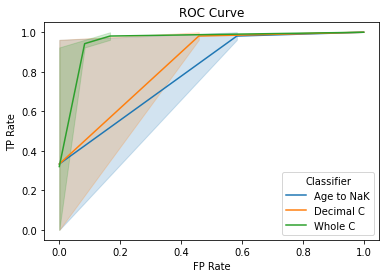

In [16]:
# Your code here
NaKfpr, NaKtpr, _ = roc_curve(y_test, predProb[:,1], pos_label=regAgeNaK.classes_[1])
decfpr, dectpr, _ = roc_curve(y_test, decProb[:,1], pos_label=decimalReg.classes_[1])
wholefpr, wholetpr, _ = roc_curve(y_test, wholeProb[:,1], pos_label=wholeReg.classes_[1])
ax = sns.lineplot(x = NaKfpr, y= NaKtpr)
ax = sns.lineplot(x= decfpr, y = dectpr)
ax = sns.lineplot(x= wholefpr,y=wholetpr)
ax.set_xlabel("FP Rate")
ax.set_ylabel("TP Rate")
ax.set_title('ROC Curve')
plt.legend(title='Classifier', loc='lower right', labels=['Age to NaK', 'Decimal C', 'Whole C'])
#6 pts

* Which classifier has a highest estimated probability of correctly distinguishing between a positive and a negative instance? How do you know?

  Probably decimal C as it has the highest in all the metrics.


# Question 8: /11 pts

Multiclass Logistic Regression

In the classification lab, we trained a binary LR classifier using the _mnist_ dataset to discriminate entries which were equal to 5 from the rest. This time you have 10 classes i.e., 0, 1, 2, 3, 4, 5, 6, 7, 8, and 9. Use the same dataset and `SGDClassifier` to tain a multiclass logistic regression model with `l2` regularization. For training, include these arguments too: `max_iter=2000`, `tol=1e-3`, `random_state=seed`. For computation speed-up, some `sklearn` functions take the argument `n_jobs=N` to run in parallel. A good value for N can be the number of physical CPU cores that your machine possesses. Check the documentations of the functions to take advantage from this where applicable. For splitting the data use `test_size=0.5` and `random_state=seed`.

Put your classifier and the `StandardScaler()` into a pipeline using `make_pipeline`. Therefore, your final model will be a pipeline that always standardizes the data before feeding it to the classifier. Use the `classification_report` to report the performance of your final model (*i.e.*, the pipeline) over the **test set**.



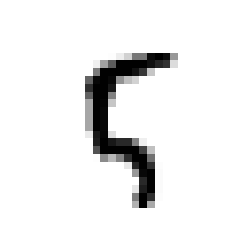

In [17]:
from sklearn import pipeline
# code here
import matplotlib as mpl
X, y = mnist["data"], mnist["target"]
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.binary,interpolation="nearest")
    plt.axis("off")
plot_digit(X[100])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y.astype('int'), test_size=0.5, random_state=seed)
sgd_model = SGDClassifier(penalty='l2', max_iter=2000, tol=1e-3,random_state=seed, n_jobs=4).fit(Xtrain,ytrain)

#9 pts

In [18]:
scaleModel = StandardScaler().fit(Xtrain, ytrain)
report = classification_report(ytest,sgd_model.predict(Xtest))
pipeline = make_pipeline(scaleModel, sgd_model)
print(report)

              precision    recall  f1-score   support

           0       0.97      0.90      0.94      3535
           1       0.95      0.97      0.96      3954
           2       0.86      0.89      0.87      3475
           3       0.83      0.88      0.85      3546
           4       0.90      0.91      0.90      3386
           5       0.63      0.91      0.74      3158
           6       0.97      0.89      0.93      3389
           7       0.87      0.94      0.90      3652
           8       0.90      0.57      0.70      3392
           9       0.90      0.80      0.85      3513

    accuracy                           0.87     35000
   macro avg       0.88      0.87      0.87     35000
weighted avg       0.88      0.87      0.87     35000



Let's see how the model generalizes to new data.

You can run the cell below to see how well your model can recognize a digit written by the mouse cursor. Set the `final_model` variable according to the name choses for your pipeline, run the cell, draw on the pop-up canvas, and once you close the canvas you will see the result.

This code will not work on headless servers such as Colab. You need to install the `tk-tools` package and run it locally.

In [ ]:
final_model = pipeline  # here use the name of your pipeline

#!pip install tk-tools
from tkinter import *
import tkinter as tk
from PIL import Image
import io
import matplotlib as mpl

temp_file_name="TEMP_image_TEMP.jpg"

app = Tk()
app.geometry("300x300")

canvas = tk.Canvas(app, bg='white')
canvas.pack(anchor='nw', fill='both', expand=1)

def get_x_and_y(event):
    global lasx, lasy
    lasx, lasy = event.x, event.y

def draw_smth(event):
    global lasx, lasy
    canvas.create_line((lasx, lasy, event.x, event.y), fill='red', width=3.5)
    lasx, lasy = event.x, event.y
    ps = canvas.postscript(colormode = 'color')
    img = Image.open(io.BytesIO(ps.encode('utf-8')))
    img.save(temp_file_name)

canvas.bind("<Button-1>", get_x_and_y)
canvas.bind("<B1-Motion>", draw_smth)

app.mainloop()

img = Image.open(temp_file_name)
#resize image to 28x28 pixels
img = img.resize((28,28))
#convert rgb to grayscale
img = img.convert("L")
img = np.array(img)
img = 255.0 - img
print("Your input:")
plt.imshow(img, cmap = mpl.cm.binary); plt.axis("off")
plt.show()

# reshaping to support our model input
img = np.reshape(img, 28*28)
#predicting the class
print('Input recognized as ' + str(final_model.predict([img])[0])+'.')

* Despite showing great scores in training and testing stages, why your model does not generalize well to new data?



```
# This is formatted as code
```
If i had to guess its because it is analysing to many features, that are just the intensity of each pixel which makes it accurate only in respect to the test data.
